# 1. Data analysis

## Loading the Required Libraries and Modules

In [85]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import metrics

## Learning About Our Data Set With Exploratory Data Analysis

### Data preparation

In [86]:
df = pd.read_csv('ozone_complet.txt', sep=';')

### Removing Null Data From Our Data Set

In [87]:
### Dimension de la base de données
df.shape

(1464, 23)

In [88]:
#le nombre des valeurs null pour xhaque variable
df.isna().sum()

maxO3     73
T6         1
T9         1
T12        1
T15        1
T18        1
Ne6        2
Ne9        2
Ne12       2
Ne15       2
Ne18       5
Vdir6      1
Vvit6      1
Vdir9      1
Vvit9      1
Vdir12     1
Vvit12     1
Vdir15     1
Vvit15     1
Vdir18     1
Vvit18     1
Vx         1
maxO3v    73
dtype: int64

<AxesSubplot:>

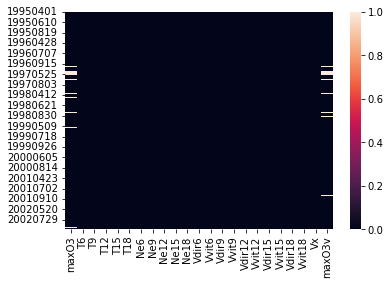

In [89]:
#visualizaton des valeur null
sns.heatmap(df.isna())

In [90]:
#suppression des valeer null
df = df.dropna()

<AxesSubplot:>

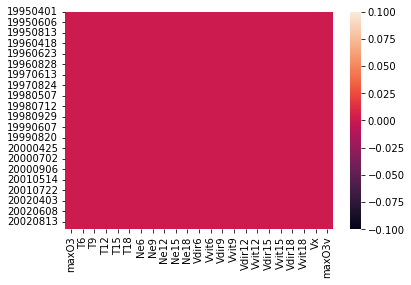

In [91]:
#visualizaton apres la suppression
sns.heatmap(df.isna())

###  Descriptive stats 

In [92]:
#afficher les premières lignes du jeu de données
df.head(5)

,maxO3,T6,T9,T12,T15,T18,Ne6,Ne9,Ne12,Ne15,...,Vdir9,Vvit9,Vdir12,Vvit12,Vdir15,Vvit15,Vdir18,Vvit18,Vx,maxO3v
19950401,47.6,10.1,11.6,13.3,13.6,12.2,8.0,8.0,8.0,8.0,...,290.0,4.0,300.0,4.0,340.0,4.0,20.0,4.0,-3.4641,62.2
19950402,56.2,9.5,9.4,13.8,17.4,16.3,8.0,8.0,7.0,0.0,...,160.0,2.0,180.0,3.0,110.0,1.0,350.0,2.0,0.0000,47.6
19950403,61.8,3.6,8.0,16.8,21.5,20.2,4.0,5.0,2.0,2.0,...,20.0,2.0,340.0,1.0,170.0,2.0,170.0,3.0,-0.3420,56.2
19950404,50.8,9.5,10.5,11.4,12.2,11.4,8.0,7.0,7.0,7.0,...,10.0,4.0,350.0,3.0,350.0,3.0,350.0,4.0,-0.5209,61.8
19950405,59.8,9.8,10.8,13.8,14.3,13.3,8.0,7.0,8.0,8.0,...,340.0,2.0,280.0,1.0,320.0,3.0,350.0,4.0,-0.9848,50.8


In [93]:
### Dimension de la base de données
df.shape

(1366, 23)

In [94]:
### Type de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1366 entries, 19950401 to 20020930
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   maxO3   1366 non-null   float64
 1   T6      1366 non-null   float64
 2   T9      1366 non-null   float64
 3   T12     1366 non-null   float64
 4   T15     1366 non-null   float64
 5   T18     1366 non-null   float64
 6   Ne6     1366 non-null   float64
 7   Ne9     1366 non-null   float64
 8   Ne12    1366 non-null   float64
 9   Ne15    1366 non-null   float64
 10  Ne18    1366 non-null   float64
 11  Vdir6   1366 non-null   float64
 12  Vvit6   1366 non-null   float64
 13  Vdir9   1366 non-null   float64
 14  Vvit9   1366 non-null   float64
 15  Vdir12  1366 non-null   float64
 16  Vvit12  1366 non-null   float64
 17  Vdir15  1366 non-null   float64
 18  Vvit15  1366 non-null   float64
 19  Vdir18  1366 non-null   float64
 20  Vvit18  1366 non-null   float64
 21  Vx      1366 non-null   fl

In [95]:
df.describe()

,maxO3,T6,T9,T12,T15,T18,Ne6,Ne9,Ne12,Ne15,...,Vdir9,Vvit9,Vdir12,Vvit12,Vdir15,Vvit15,Vdir18,Vvit18,Vx,maxO3v
count,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,...,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000
mean,84.920205,12.298609,16.387482,19.428697,20.345095,18.780747,5.012445,5.166179,5.332357,5.142020,...,195.453880,3.732796,204.721816,4.513909,208.265007,4.790630,190.556369,4.381406,-0.768286,84.974817
std,23.116711,3.890976,4.100004,4.897765,5.245008,5.046637,2.900902,2.549047,2.313064,2.321811,...,106.888284,1.864547,105.638974,2.063681,110.700030,2.062418,121.444834,1.750413,3.395400,23.370954
min,33.200000,-1.600000,4.500000,5.700000,5.700000,4.400000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.392300,33.200000
25%,68.000000,10.000000,13.800000,16.300000,16.800000,15.500000,2.000000,3.000000,4.000000,3.000000,...,100.000000,2.000000,110.000000,3.000000,102.500000,3.000000,60.000000,3.000000,-3.074700,68.000000
50%,80.700000,12.700000,16.700000,19.400000,20.400000,18.600000,6.000000,6.000000,6.000000,6.000000,...,210.000000,4.000000,220.000000,4.000000,230.000000,5.000000,220.000000,4.000000,-1.026100,80.700000
75%,98.000000,15.100000,19.000000,22.600000,23.900000,22.000000,8.000000,7.000000,7.000000,7.000000,...,290.000000,5.000000,290.000000,6.000000,300.000000,6.000000,290.000000,6.000000,1.500000,98.000000
max,166.000000,21.700000,28.600000,33.500000,35.500000,34.100000,9.000000,9.000000,8.000000,8.000000,...,360.000000,12.000000,360.000000,12.000000,360.000000,16.000000,360.000000,12.000000,10.832900,173.000000


In [96]:
#The Prevalence of Each Classification Category

### Variables Analysis

#### Distribution Variables

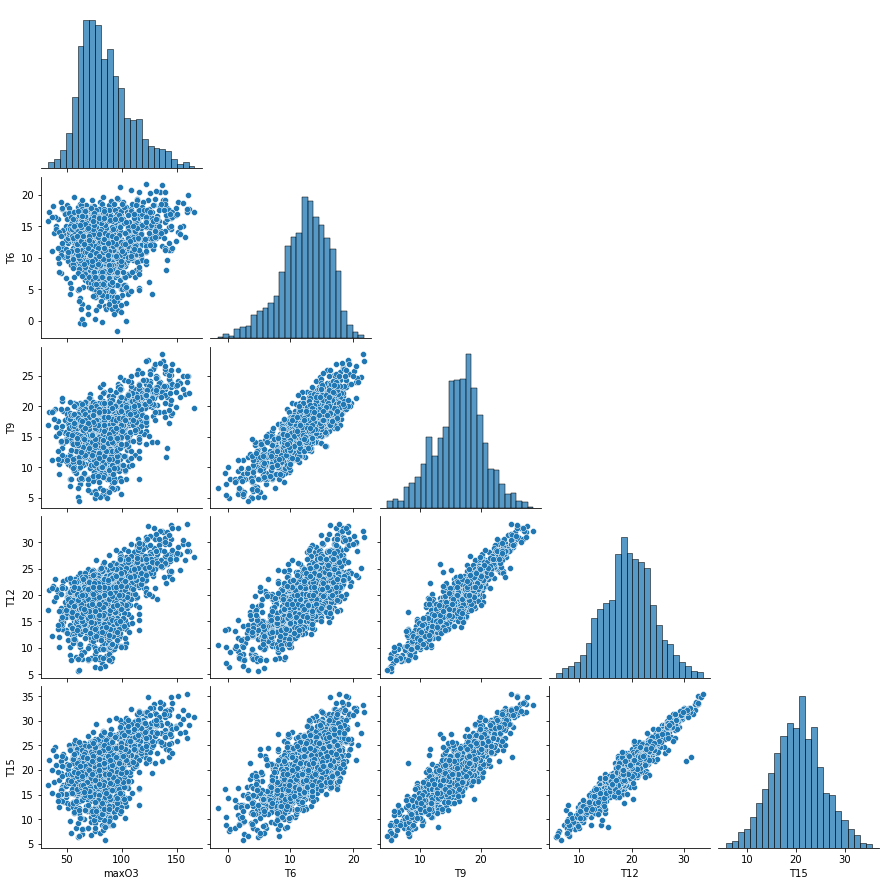

In [97]:
# pd.plotting.scatter_matrix(df, c=y, figsize=(12, 10))
sns.pairplot(df.iloc[:, :5], corner=True)
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

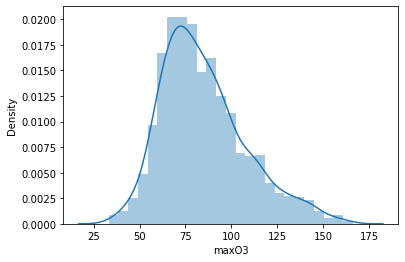

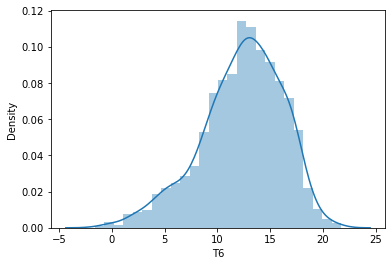

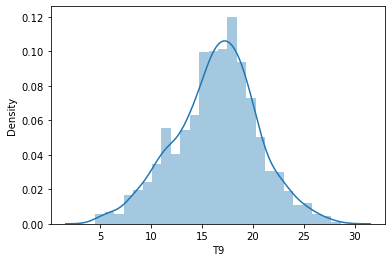

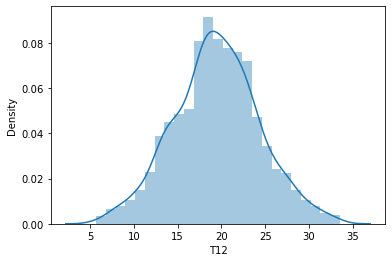

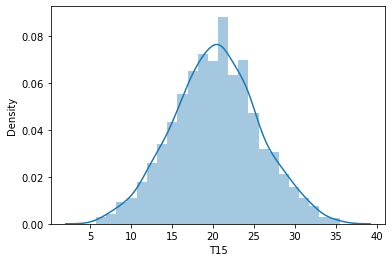

In [98]:
#the first five variables
i= 0
for col in df.keys():
    if i == 5:
        break 
    plt.figure()
    sns.distplot(df[col])
    i+=1

### Variables-Targuet Relation

#### Variables-Targuet 

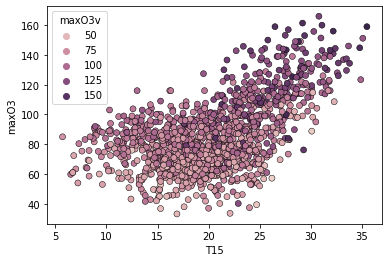

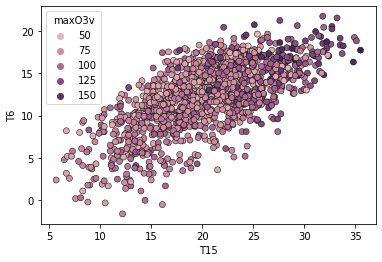

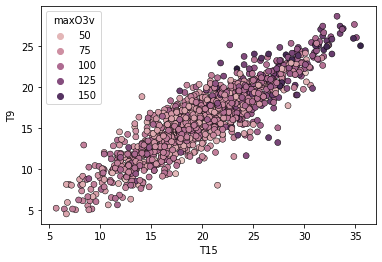

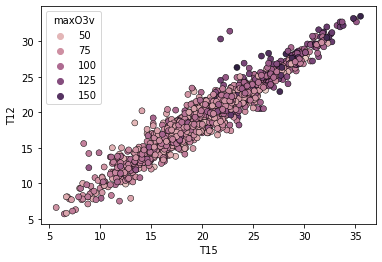

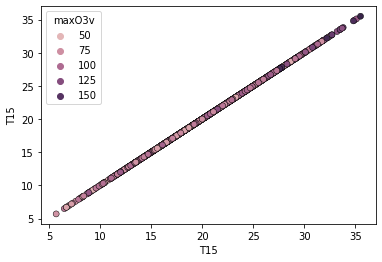

In [99]:
#the first five variables
# new data
X_new = np.array([[5.6, 2.8, 3.9, 1.1], [5.7, 2.6, 3.8, 1.3], [4.7, 3.2, 1.3, 0.2]])
i= 0
for col in df.keys():
    if i == 5:
        break 
    fig, ax = plt.subplots()
    sns.scatterplot(data=df, x='T15', y=col, hue='maxO3v', ax=ax, edgecolor='k')
    plt.show()
    i+=1

### Examiner le targuet

<AxesSubplot:xlabel='maxO3v', ylabel='count'>

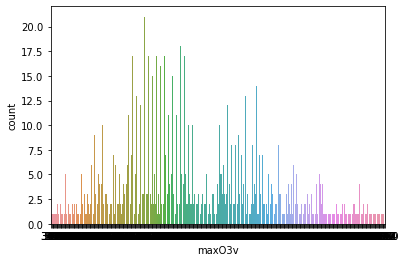

In [100]:
sns.countplot(x='maxO3v', data=df)

### Matrice de corrélation entre les variables(explicatives et prédire)

<AxesSubplot:>

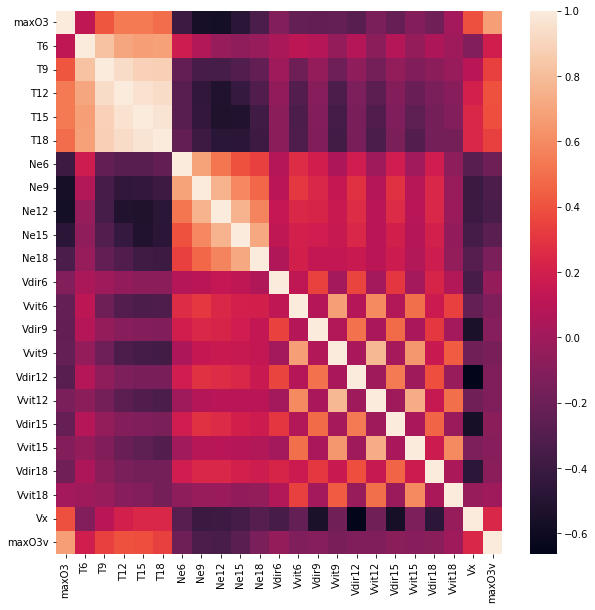

In [101]:
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# 2. Protocole expérimental (apprentissage/validation/test)


### Creating Training Data and Test Data

In [102]:
y = df['maxO3v']
X = df.drop('maxO3v', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Create the linear regression model

In [103]:
# instantiate the model
reg_all = LinearRegression()

# fit on the training set
reg_all.fit(X_train, y_train)


LinearRegression()

### Generate predictions model

In [104]:
# predict on the test set
y_pred = reg_all.predict(X_test)

### Measuring the Performance of a linear regression Machine Learning Model

In [105]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 13.442178431562933
Mean Squared Error: 304.76979060275363
Root Mean Squared Error: 17.457657076559663


In [106]:
# score the model
score = reg_all.score(X_test, y_test)

print(f'Model Score: {score:0.3f}')


Model Score: 0.424


In [107]:
# Compute and print R^2 and RMSE
print(f"R^2: {reg_all.score(X_test, y_test):0.3f}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:0.3f}")

R^2: 0.424


NameError: name 'mean_squared_error' is not defined

In [108]:
d = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
d

,Actual,Predicted
20020725,79.0,64.028172
19970427,65.8,70.573337
20020518,113.0,89.842706
20020418,100.0,81.282002
19990517,106.0,96.795239
...,...,...
19970922,106.6,109.198731
19950516,77.2,54.612070
20020509,112.0,93.756713
20000828,66.0,74.934631


### Plotting the predicted versus actual values

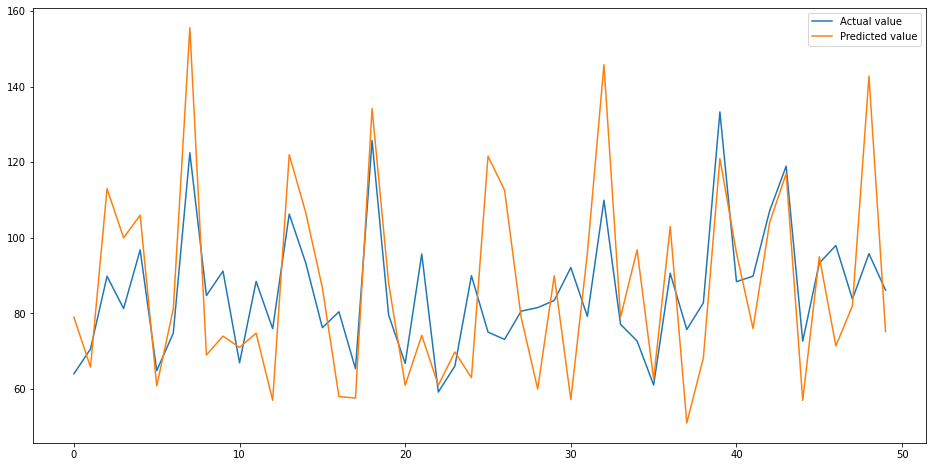

In [109]:
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

### Training and Making Predictions with the DNN Model

In [110]:
print("Dimensions de x_train :", X_train.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de x_test  :", X_test.shape)
print("Dimensions de y_test  :", y_test.shape)

Dimensions de x_train : (1092, 22)
Dimensions de y_train : (1092,)
Dimensions de x_test  : (274, 22)
Dimensions de y_test  : (274,)


In [111]:
model = keras.models.Sequential(name='DNN')
model.add(layers.Input((22,), name="Couche_in"))
model.add(layers.Dense(60, activation='relu', name='Couche_cachee1'))
model.add(layers.Dense(60, activation='relu', name='Couche_cachee2'))
model.add(layers.Dense(1, name='Couche_out'))

In [112]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['mae'])

In [113]:
model.summary()

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Couche_cachee1 (Dense)      (None, 60)                1380      
                                                                 
 Couche_cachee2 (Dense)      (None, 60)                3660      
                                                                 
 Couche_out (Dense)          (None, 1)                 61        
                                                                 
Total params: 5,101
Trainable params: 5,101
Non-trainable params: 0
_________________________________________________________________


In [114]:
hist = model.fit(X_train,
                 y_train,
                 epochs=100,
                 batch_size=50)

Epoch 1/100
22/22 [==============================] - 1s 5ms/step - loss: 1.0142e-05 - mae: 58.0910
Epoch 2/100
22/22 [==============================] - 0s 6ms/step - loss: 1.0142e-05 - mae: 58.0910
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 1.0142e-05 - mae: 58.0910
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 1.0142e-05 - mae: 58.0910
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 1.0142e-05 - mae: 58.0910
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 1.0142e-05 - mae: 58.0910
Epoch 7/100
22/22 [==============================] - 0s 6ms/step - loss: 1.0142e-05 - mae: 58.0910
Epoch 8/100
22/22 [==============================] - 0s 5ms/step - loss: 1.0142e-05 - mae: 58.0910
Epoch 9/100
22/22 [==============================] - 0s 5ms/step - loss: 1.0142e-05 - mae: 58.0910
Epoch 10/100
22/22 [==============================] - 0s 5ms/step - loss: 1.0142e-05 - mae: 58.0910
Epoch 11/

### Making Predictions With Our DNN Model

In [115]:
pred_test = model.predict(X_test)
pred_test.shape

(274, 1)

In [116]:
pred_test = model.predict(X_test)
np.mean(np.array([int(pred_test[i][0]+0.5) for i in range(len(pred_test))])==y_test)

0.0

### Measuring the Performance of a DNN Machine Learning Model

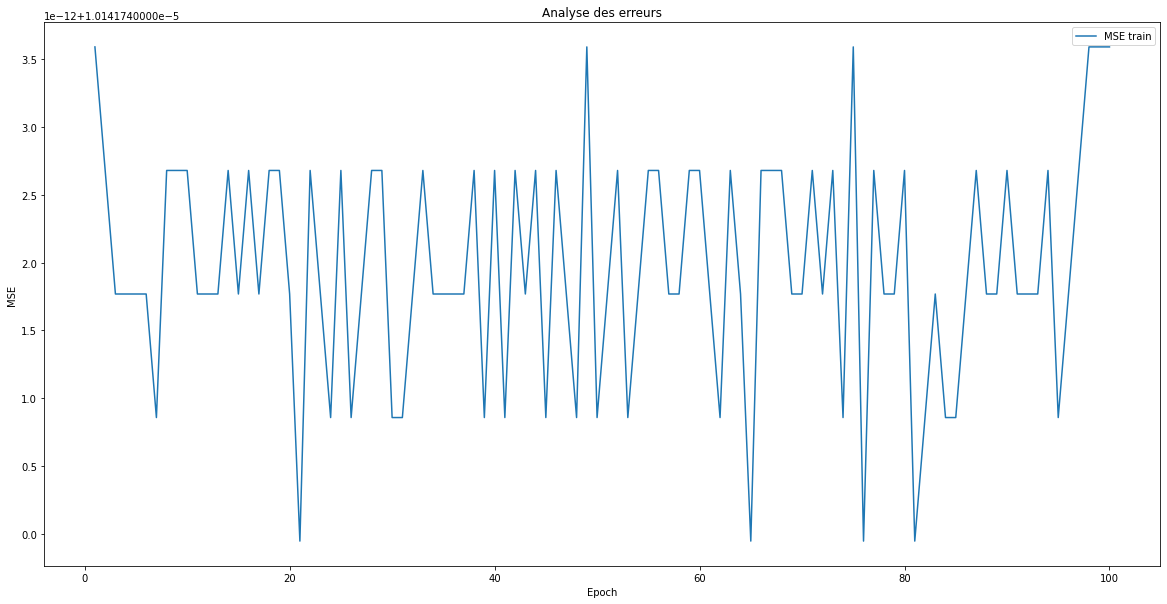

In [117]:
figure = plt.gcf()
figure.set_size_inches((20, 10))
plt.title('Analyse des erreurs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.legend(['MSE train', 'MSE validation'])
plt.show()

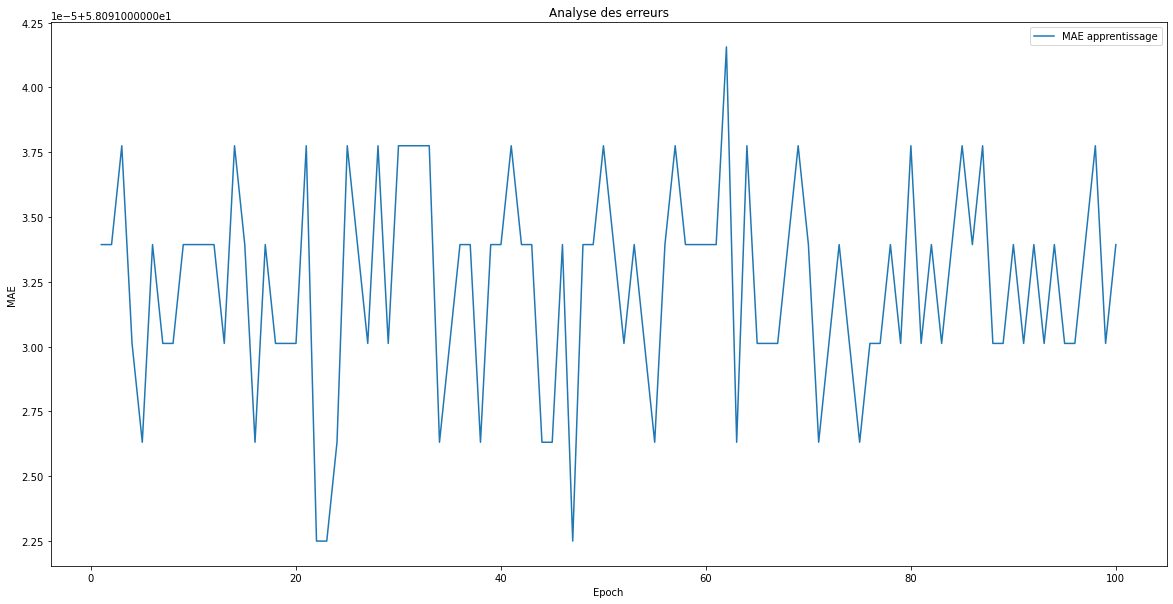

In [118]:
figure = plt.gcf()
figure.set_size_inches((20, 10))
plt.title('Analyse des erreurs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'])
plt.legend(['MAE apprentissage', 'MAE validation'])
plt.show()

In [119]:
result_train = model.evaluate(X_train, y_train, verbose=0)
print('MSE valid', round(result_train[0],2))
print('MAE valid', round(result_train[1],2))

MSE valid 0.0
MAE valid 58.09


In [120]:
result_test = model.evaluate(X_test, y_test, verbose=0)
print('MSE test', round(result_test[0],2))
print('MAE test', round(result_test[1],2))

MSE test 0.0
MAE test 59.0
